<a href="https://colab.research.google.com/github/LBMH-lang/CTDLGT_Python/blob/main/code_ph%C3%A2n_t%C3%ADch_th%E1%BB%91ng_k%C3%AA_m%C3%B4_t%E1%BA%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt các thư viện

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy.stats as stats

In [4]:
Du_lieu1 = pd.read_csv("Tập dữ liệu Z.csv")

In [5]:
Du_lieu1.sample(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
52,22,1.0,42,166,85,1,81.5
58,44,1.0,33,190,76,2,72.5
69,70,1.0,37,173,78,3,77.5
72,73,1.0,40,179,79,3,74.5
25,36,0.0,48,163,66,2,64.0
38,60,0.0,58,141,70,3,63.0
71,72,1.0,26,179,78,3,69.4
5,4,0.0,33,171,64,1,61.1
46,16,1.0,31,158,72,1,70.9
30,52,0.0,51,165,60,3,53.0


In [6]:
high = low =  placebo = []
high = Du_lieu1['gender'][Du_lieu1['Age'][Du_lieu1['Height'][Du_lieu1['pre.weight'][Du_lieu1['Diet'][Du_lieu1['weight6weeks'] == 'high']]]]]
low = Du_lieu1['gender'][Du_lieu1['Age'][Du_lieu1['Height'][Du_lieu1['pre.weight'][Du_lieu1['Diet'][Du_lieu1['weight6weeks'] == 'low']]]]]
placebo = Du_lieu1['gender'][Du_lieu1['Age'][Du_lieu1['Height'][Du_lieu1['pre.weight'][Du_lieu1['Diet'][Du_lieu1['weight6weeks'] == 'placebo']]]]]

In [7]:
gender = Du_lieu1['gender']
Age = Du_lieu1['Age']
Height = Du_lieu1['Height']
weight = Du_lieu1['pre.weight']
Diet = Du_lieu1['Diet']
weight6weeks = Du_lieu1['weight6weeks']

Kiểm định Bartlett

In [7]:
# tiếp theo ta sẽ dùng Kiểm định tính thuần nhất của phương sai (homogeneity of variance)
from scipy.stats import bartlett
print('Kiểm định Bartlett:')
bartlett_test = bartlett(gender,Age,Height,weight,Diet,weight6weeks)
print(bartlett_test)
bartlettvalue,pvalue=bartlett_test
if (bartlettvalue > 0) and (pvalue < 0.05):
    print('Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova')
else:
    print('Phương sai các nhóm  bằng nhau.')
print('-'*50)

Kiểm định Bartlett:
BartlettResult(statistic=656.9361929299977, pvalue=1.002775173314174e-139)
Phương sai các nhóm không bằng nhau. Ta không thể sử dụng kiểm định Anova
--------------------------------------------------


Trung bình cộng của từng cột trong tập dữ liệu

In [11]:
Mean_EZ = Du_lieu1.mean(axis = 0)
Mean_EZ

Person           39.500000
gender            0.434211
Age              39.153846
Height          170.820513
pre.weight       72.525641
Diet              2.038462
weight6weeks     68.680769
dtype: float64

Phương sai của từng cột trong tập dữ liệu

In [12]:
Mean_EZ2 = Du_lieu1.var(axis= 0)
Mean_EZ2

Person          513.500000
gender            0.248947
Age              96.339660
Height          127.162171
pre.weight       76.096737
Diet              0.660839
weight6weeks     79.646768
dtype: float64

Độ lệch chuẩn của từng cột trong tập dữ liệu

In [13]:
Mean_EZ3 = Du_lieu1.std(axis= 0)
Mean_EZ3

Person          22.660538
gender           0.498946
Age              9.815277
Height          11.276621
pre.weight       8.723344
Diet             0.812920
weight6weeks     8.924504
dtype: float64

Giá trị lớn nhất và nhỏ nhất của từng cột trong tập dữ liệu

In [17]:
max1 = np.nanmax(Du_lieu1.iloc[:, 1].values)
min1 = np.nanmin(Du_lieu1.iloc[:, 1].values)
max2 = np.nanmax(Du_lieu1.iloc[:, 2].values)
min2 = np.nanmin(Du_lieu1.iloc[:, 2].values)
max3 = np.nanmax(Du_lieu1.iloc[:, 3].values)
min3 = np.nanmin(Du_lieu1.iloc[:, 3].values)
max4 = np.nanmax(Du_lieu1.iloc[:, 4].values)
min4 = np.nanmin(Du_lieu1.iloc[:, 4].values)
max5 = np.nanmax(Du_lieu1.iloc[:, 5].values)
min5 = np.nanmin(Du_lieu1.iloc[:, 5].values)
max6 = np.nanmax(Du_lieu1.iloc[:, 6].values)
min6 = np.nanmin(Du_lieu1.iloc[:, 6].values)

print('min của Person:', min1)
print('max của gender:', max2)
print('min của gender:', min2)
print('max của Age:', max3)
print('min của Age:', min3)
print('max của Height:', max4)
print('min của Height:', min4)
print('max của pre.weight:', max5)
print('min của pre.weight:', min5)
print('max của Diet:', max6)
print('min của Diet:', min6)


min của Person: 0.0
max của gender: 60
min của gender: 16
max của Age: 201
min của Age: 141
max của Height: 103
min của Height: 58
max của pre.weight: 3
min của pre.weight: 1
max của Diet: 103.0
min của Diet: 53.0


In [36]:
class thongke():
    def __init__(self, data):
        self.mean = np.mean(data)
        self.med = np.median(data)
        self.mod = statistics.mode(data)
        self.min = np.min(data)
        self.max = np.max(data)
        self.std = np.std(data)
        self.name = data.name
        self.data = (data - self.mean) /self.std
      
    def hist(self):
        plt.figure()
        ax = sns.distplot(self.data)
        plt.axvline(np.mean(self.data), color="r", linestyle="dashed", linewidth=5)
        _, max_ = plt.ylim()
        plt.text(
            self.data.mean() + self.data.mean() / 10,
            max_ - max_ / 10,
            "Mean: {:.2f}".format(self.mean),
        )
        plt.title(self.name)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show();   
    def qq(self):
        sm.qqplot(self.data, line='45')
        plt.show()
        a = [0.25,0.5,0.75]
        b = self.data.quantile(a)
        c = pd.DataFrame(b,a)
        print(c)
        print('-'*50)
    def shapiro(self):
        print('Kiểm định Shapori:')
        stat, p = stats.shapiro(self.data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        else:
            print('Dữ liệu không tuân theo luật phân phối chuẩn, ta không thể sử dụng kiểm định Anova')
        print('-'*50)
    #def anova(self):
        #print('kiểm định anova:')
        #statistic, p_value = f_oneway(self.name)
        #print('statistic:',statistic, '; p value:',p_value)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


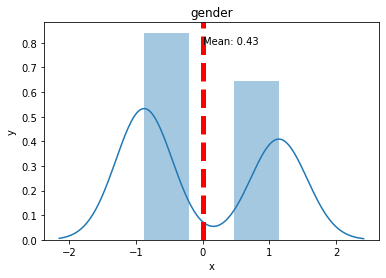

In [31]:
gender = thongke(gender)
gender.hist()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


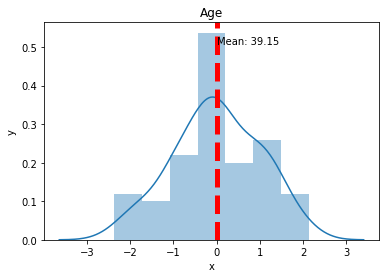

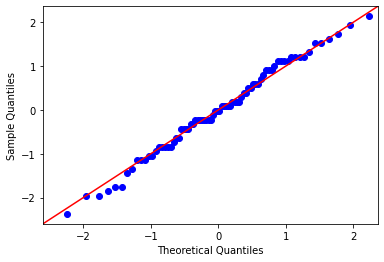

           Age
0.25 -0.707930
0.50 -0.015776
0.75  0.778921
--------------------------------------------------


In [32]:
Age = thongke(Age)
Age.hist()
Age.qq()

Biểu đồ Weight6weeks:

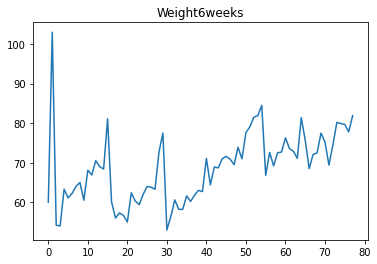

In [13]:
plt.plot(weight6weeks)
plt.title("Weight6weeks")
plt.show()

Biểu đồ Height:

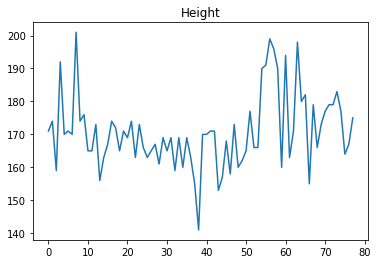

In [14]:
plt.plot(Height)
plt.title("Height")
plt.show()

Biểu đồ Weight:

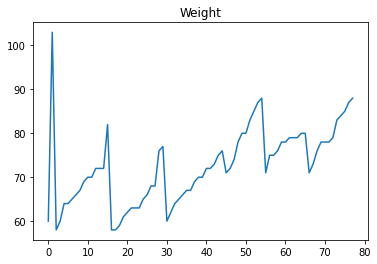

In [15]:
plt.plot(weight)
plt.title("Weight")
plt.show()

In [ ]:
max7 = np.nanmax(Du_lieu1.iloc[:, 7].values)
min7 = np.nanmin(Du_lieu1.iloc[:, 7].values)
print('max của weight6weeks', max7)
print('min của weight6weeks', min7)